In [ ]:
pip install shap

In [12]:
### Import libraries
import pandas as pd

from sklearn import model_selection
import xgboost as xgb

import joblib as jb

import shap

In [5]:
### Import data
feature_matrix = pd.read_pickle('D:\\jupyterDatasets\\20221112_table_feature_matrix.csv')
target = pd.read_pickle('D:\\jupyterDatasets\\20221119_table_target.csv')

print(feature_matrix.shape)
print(target.shape)

(836553, 70)
(836553,)


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_matrix, target, test_size=0.2, random_state=1)
train = xgb.DMatrix(data=X_train, label=y_train)
test = xgb.DMatrix(data=X_test, label=y_test)

print('Prevalence y train:', round(sum(y_train) / len(y_train), 4))
print('Prevalence y test:', round(sum(y_test) / len(y_test), 4))

Prevalence y train: 0.4234
Prevalence y test: 0.423


In [14]:
# Import model
xgb_clf = jb.load('C:\\Users\\Megaport\\Desktop\\jupyterNotebook\\grid_search\\optimal_xgb.joblib')

In [15]:
# SHAP
explainer =  shap.TreeExplainer(xgb_clf)
%time shap_values = explainer.shap_values(test)

CPU times: total: 18min 34s
Wall time: 5min 47s


In [19]:
shap_values[1]

array([ 2.32048538e-02,  4.66261245e-03, -1.22293338e-01, -3.24189174e-03,
       -1.25611282e-03, -2.54116429e-04, -3.97467427e-02,  8.12984363e-04,
        1.13550527e-02,  6.80749712e-04, -1.82366476e-03, -1.74486125e-03,
        2.01392104e-04, -3.00527588e-02,  6.35275501e-04, -4.47293743e-02,
       -1.12174943e-01,  3.10937129e-02,  8.27327073e-02,  6.00122288e-03,
        2.06541326e-02,  8.87316186e-03, -2.00210285e-04, -2.94368248e-04,
       -4.04667808e-03, -1.48227196e-02, -7.45681406e-04,  1.61576655e-03,
       -5.86811453e-02, -1.60710067e-01,  1.06747195e-01,  4.34984191e-04,
        1.33462429e-01, -6.22948213e-03,  2.95549452e-01,  1.44775584e-03,
       -2.47932792e-01, -5.38229197e-02, -1.95630756e-03,  1.55762983e-02,
        7.96365291e-02,  1.46979559e-02, -2.94591319e-02, -2.42958829e-01,
        2.59420406e-02,  9.45656896e-02,  7.23261759e-03, -2.37536076e-02,
        4.52863351e-02,  4.40104045e-02,  3.31943572e-01,  1.37590647e-01,
       -1.42245954e-02, -

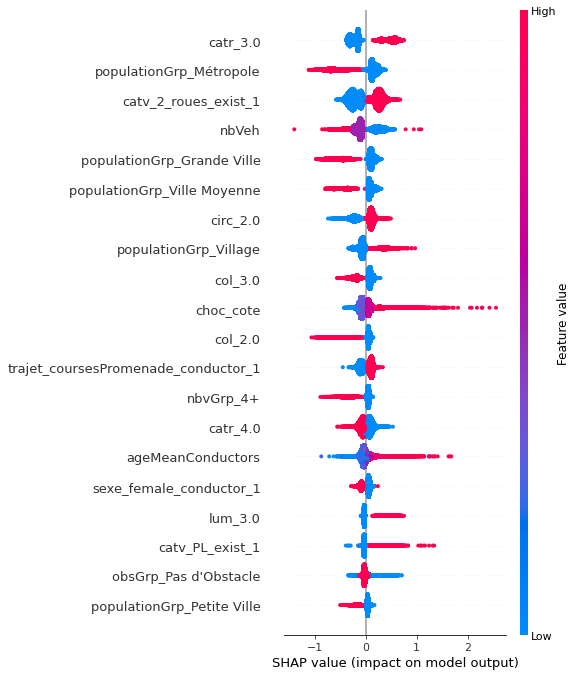

In [27]:
### SHAP plot - Relation of variables
shap.summary_plot(shap_values, X_test, plot_type='dot')

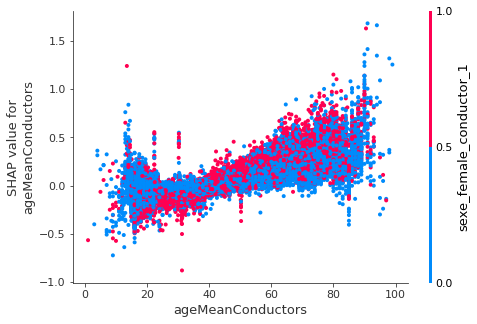

In [29]:
### SHAP plot - Relation target with 2 variables
shap.dependence_plot("ageMeanConductors", shap_values, X_test, interaction_index= 'sexe_female_conductor_1')

In [32]:
### SHAP plot - Impact of each modality for one person
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])